# Introdução

### Tema:

Consumo de alcool por estudantes.

### Pergunta

Dado o sexo, a idade, a educação formal da mãe e do pai, o tempo de estudo semanal, a qualidade da relação familiar e o tempo livre depois da escola, quão provável o estudante estudante irá consumir alcool durante dias úteis e durante finais de semana?

### Objetivo:

Prever um rótulo (target qualitativo), variando entre 5 escalas de "pouco provável" até "muito provável".

### Técnica Utilizada

Classificação

*_Colocar aqui a justificativa para a técnica_*

### Base de Dados

*_Colocar aqui a descrição das colunas analisadas igual no Kaggle_*

### Trabalhos Acadêmicos

*_Colocar aqui publicações que relacionem dados socioeconômicos com consumo de alcool por estudantes_*

### Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import csv
import matplotlib.pyplot as plt

# Minerando Dados e Características do Dataset

In [2]:
student_mat_data = pd.read_csv('student-mat.csv')

student_por_data = pd.read_csv('student-por.csv')

base_inic = pd.concat([student_por_data,student_mat_data],ignore_index=True)

base = base_inic[['G3','Walc','sex','age', 'health','failures', 'studytime', 'Medu', 'Fedu', 'famrel', 'goout','freetime', 'absences']]

base

,G3,Walc,sex,age,health,failures,studytime,Medu,Fedu,famrel,goout,freetime,absences
0,11,1,F,18,3,0,2,4,4,4,4,3,4
1,11,1,F,17,3,0,2,1,1,5,3,3,2
2,12,3,F,15,3,0,2,1,1,4,2,3,6
3,14,1,F,15,5,0,3,4,2,3,2,2,0
4,13,2,F,16,5,0,2,3,3,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,9,5,M,20,4,2,2,2,2,5,4,5,11
1040,16,4,M,17,2,0,1,3,1,2,5,4,3
1041,7,3,M,21,3,3,1,1,1,5,3,5,3
1042,10,4,M,18,5,0,1,3,2,4,1,4,0


### Índice do Dataset

1-school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2-sex - student's sex (binary: 'F' - female or 'M' - male)

3-age - student's age (numeric: from 15 to 22)

4-address - student's home address type (binary: 'U' - urban or 'R' - rural)

5-famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6-Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7-Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8-Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9-Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10-Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11-reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12-guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13-traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14-studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15-failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16-schoolsup - extra educational support (binary: yes or no)

17-famsup - family educational support (binary: yes or no)

18-paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19-activities - extra-curricular activities (binary: yes or no)

20-nursery - attended nursery school (binary: yes or no)

21-higher - wants to take higher education (binary: yes or no)

22-internet - Internet access at home (binary: yes or no)

23-romantic - with a romantic relationship (binary: yes or no)

24-famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25-freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26-goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27-Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28-Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29-health - current health status (numeric: from 1 - very bad to 5 - very good)

30-absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

    *G1 - first period grade (numeric: from 0 to 20)
    *G2 - second period grade (numeric: from 0 to 20)
    *G3 - final grade (numeric: from 0 to 20, output target)

#### Aqui escolhemos renomear a coluna G3 por um nome mais intuitivo com todo tema do dataset.

In [3]:
base.rename(columns={'sex':'Genero'}, inplace=True)
base.rename(columns={'age':'Idade'}, inplace=True)
base.rename(columns={'health':'Saúde'}, inplace=True)
base.rename(columns={'failures':'Reprovações'}, inplace=True)
base.rename(columns={'famrel':'Rel. familiar'}, inplace=True)
base.rename(columns={'Walc':'Cons_fim'}, inplace=True)
base.rename(columns={'G3':'Nota Final'}, inplace=True)
base.rename(columns={'absences':'Faltas'}, inplace=True)
base


C:\Users\spedr\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Nota Final,Cons_fim,Genero,Idade,Saúde,Reprovações,studytime,Medu,Fedu,Rel. familiar,goout,freetime,Faltas
0,11,1,F,18,3,0,2,4,4,4,4,3,4
1,11,1,F,17,3,0,2,1,1,5,3,3,2
2,12,3,F,15,3,0,2,1,1,4,2,3,6
3,14,1,F,15,5,0,3,4,2,3,2,2,0
4,13,2,F,16,5,0,2,3,3,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,9,5,M,20,4,2,2,2,2,5,4,5,11
1040,16,4,M,17,2,0,1,3,1,2,5,4,3
1041,7,3,M,21,3,3,1,1,1,5,3,5,3
1042,10,4,M,18,5,0,1,3,2,4,1,4,0


#### Neste passo, estamos veficando se existe algum valor nulo, para assim garantir que não haja nenhuma alteração nos valores finais. Como resultado, descobrimos que não havia nenhuma linha nula, assim não tivemos que retirar nada do dataset.

In [4]:
base.isnull().sum()

Nota Final       0
Cons_fim         0
Genero           0
Idade            0
Saúde            0
Reprovações      0
studytime        0
Medu             0
Fedu             0
Rel. familiar    0
goout            0
freetime         0
Faltas           0
dtype: int64

#### Aqui foi feito a definição de quais são as colunas categoricas.

In [5]:
falsas_numericas = ['Cons_fim','Saúde','studytime','Medu','Fedu','Rel. familiar', 'goout', 'freetime','Genero']
categoricas = base.select_dtypes(exclude=[np.number]).columns

for column in falsas_numericas:
    base[column] = base[column].astype('category')

for column in categoricas:
    base[column] = base[column].astype('object')
    
num_base = base.select_dtypes(include=[np.number]).columns
cat_base = base.select_dtypes(exclude=[np.number]).columns
print(num_base)
print("\n {}".format(cat_base))

Index(['Nota Final', 'Idade', 'Reprovações', 'Faltas'], dtype='object')

 Index(['Cons_fim', 'Genero', 'Saúde', 'studytime', 'Medu', 'Fedu',
       'Rel. familiar', 'goout', 'freetime'],
      dtype='object')


<ipython-input-5-f8b7db615ab9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base[column] = base[column].astype('category')
<ipython-input-5-f8b7db615ab9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base[column] = base[column].astype('object')


In [6]:
base['Genero']=base['Genero'].replace('M',1)
base['Genero']=base['Genero'].replace('F',2)
base

<ipython-input-6-b2127ed45c36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['Genero']=base['Genero'].replace('M',1)
<ipython-input-6-b2127ed45c36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['Genero']=base['Genero'].replace('F',2)


,Nota Final,Cons_fim,Genero,Idade,Saúde,Reprovações,studytime,Medu,Fedu,Rel. familiar,goout,freetime,Faltas
0,11,1,2,18,3,0,2,4,4,4,4,3,4
1,11,1,2,17,3,0,2,1,1,5,3,3,2
2,12,3,2,15,3,0,2,1,1,4,2,3,6
3,14,1,2,15,5,0,3,4,2,3,2,2,0
4,13,2,2,16,5,0,2,3,3,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,9,5,1,20,4,2,2,2,2,5,4,5,11
1040,16,4,1,17,2,0,1,3,1,2,5,4,3
1041,7,3,1,21,3,3,1,1,1,5,3,5,3
1042,10,4,1,18,5,0,1,3,2,4,1,4,0


In [7]:
base.describe()

,Nota Final,Genero,Idade,Reprovações,Faltas
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,11.341954,1.566092,16.726054,0.264368,4.434866
std,3.864796,0.495850,1.239975,0.656142,6.210017
min,0.000000,1.000000,15.000000,0.000000,0.000000
25%,10.000000,1.000000,16.000000,0.000000,0.000000
50%,11.000000,2.000000,17.000000,0.000000,2.000000
75%,14.000000,2.000000,18.000000,0.000000,6.000000
max,20.000000,2.000000,22.000000,3.000000,75.000000


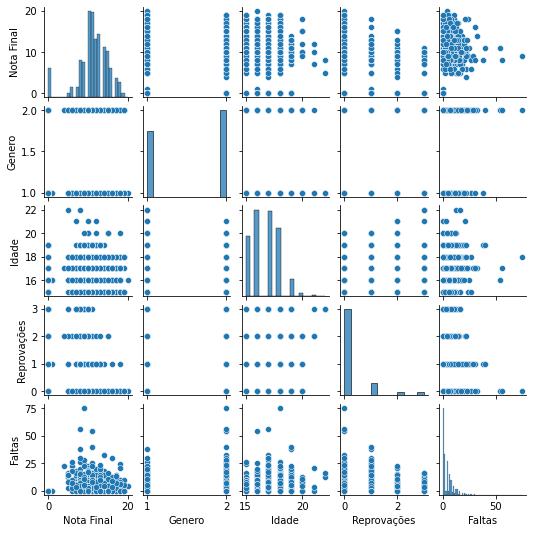

In [8]:
import seaborn as sns
sns.pairplot(base, height=1.5);

# Modelos de Predição

# Processo e Estatísticas de Validação

# Conclusão

# Referências Bibliográficas